# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.SimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles = 5000000, bundle_size = 1)
simulator = simulation.Simulator(results, waves = 1, bundles = 200000, bundle_size = 1)

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/OPTICS/SIM/optic-sim/simulation.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/1 [00:00<?, ?it/s]

energy_per_bin_j [[[[1.431673e-10 1.252714e-10 1.431673e-10 1.252714e-10]
   [3.400223e-10 4.295018e-10 2.684386e-10 3.221264e-10]
   [6.979404e-10 5.726691e-10 6.084609e-10 5.368773e-10]
   ...
   [7.337323e-10 8.411077e-10 8.411077e-10 5.726691e-10]
   [4.116059e-10 6.263568e-10 4.652936e-10 3.221264e-10]
   [8.947954e-11 1.252714e-10 8.947954e-11 1.610632e-10]]

  [[7.158363e-11 7.158363e-11 1.789591e-10 1.610632e-10]
   [3.937100e-10 4.116059e-10 2.505427e-10 5.189814e-10]
   [6.800445e-10 8.411077e-10 6.800445e-10 7.695241e-10]
   ...
   [8.590036e-10 6.979404e-10 6.442527e-10 5.905650e-10]
   [3.400223e-10 5.010854e-10 3.042304e-10 4.473977e-10]
   [1.252714e-10 2.147509e-10 1.073755e-10 7.158363e-11]]

  [[8.947954e-11 7.158363e-11 2.147509e-10 1.073755e-10]
   [4.295018e-10 4.295018e-10 2.863345e-10 4.295018e-10]
   [5.189814e-10 7.158363e-10 7.874200e-10 5.547732e-10]
   ...
   [6.442527e-10 6.084609e-10 6.442527e-10 7.516282e-10]
   [3.937100e-10 3.758141e-10 3.042304e-10 5.7

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))
print(cp.sum(results._box_stage._histogram_4d_count._hist))
print(cp.sum(results._diffuser_stage._histogram_4d_count._hist))


200000.0
196299.0
143681.0


photon bundle count: 200000
photon total energy (J): 3.579181724592634e-06


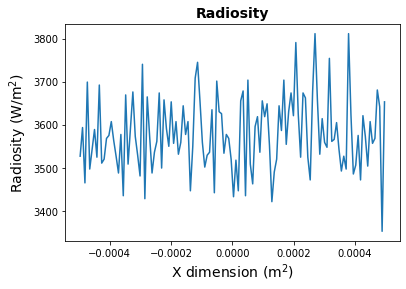

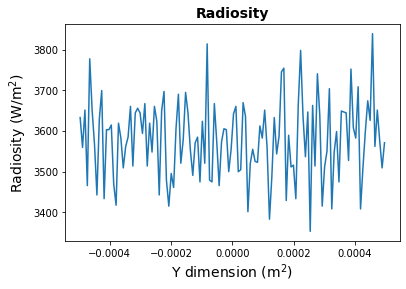

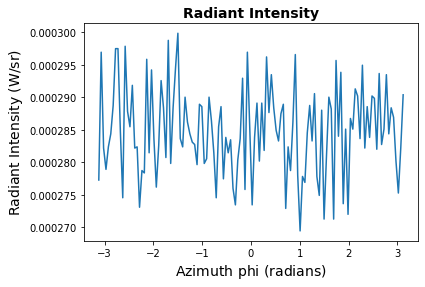

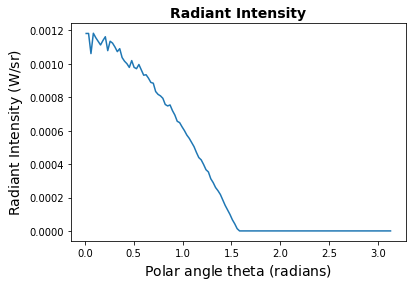

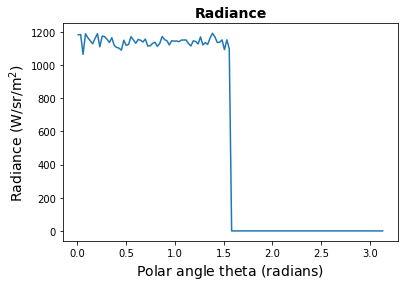

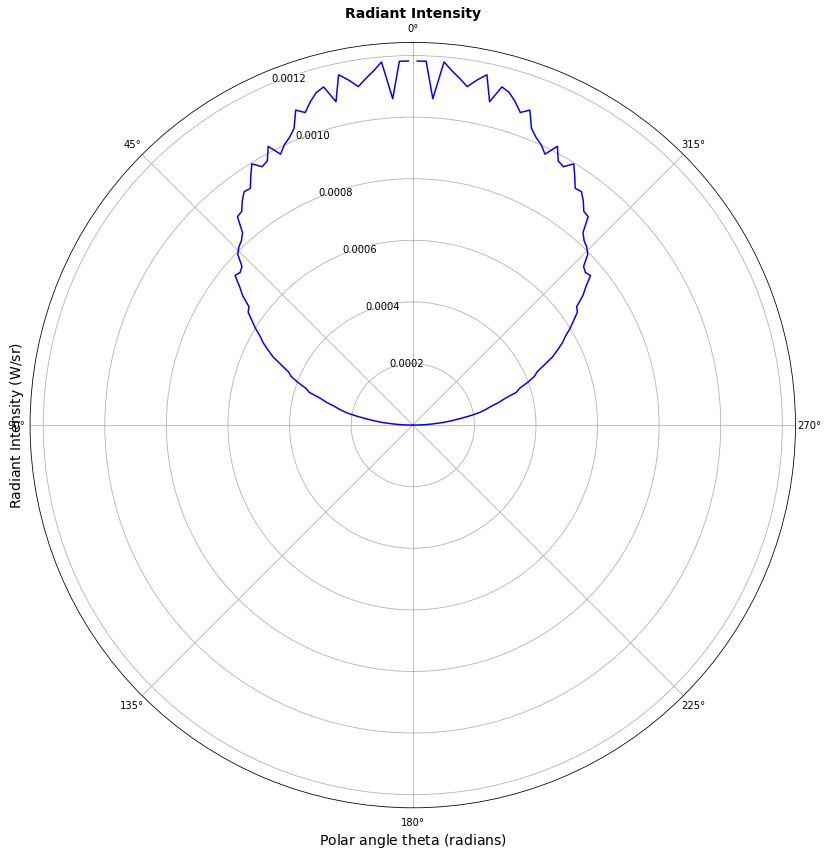

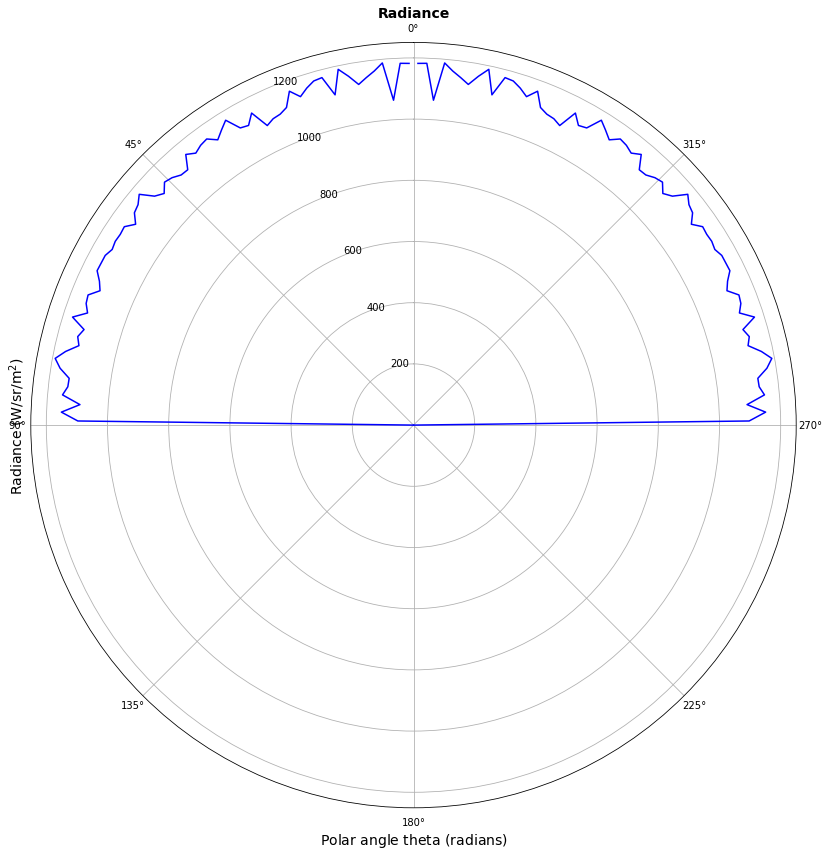

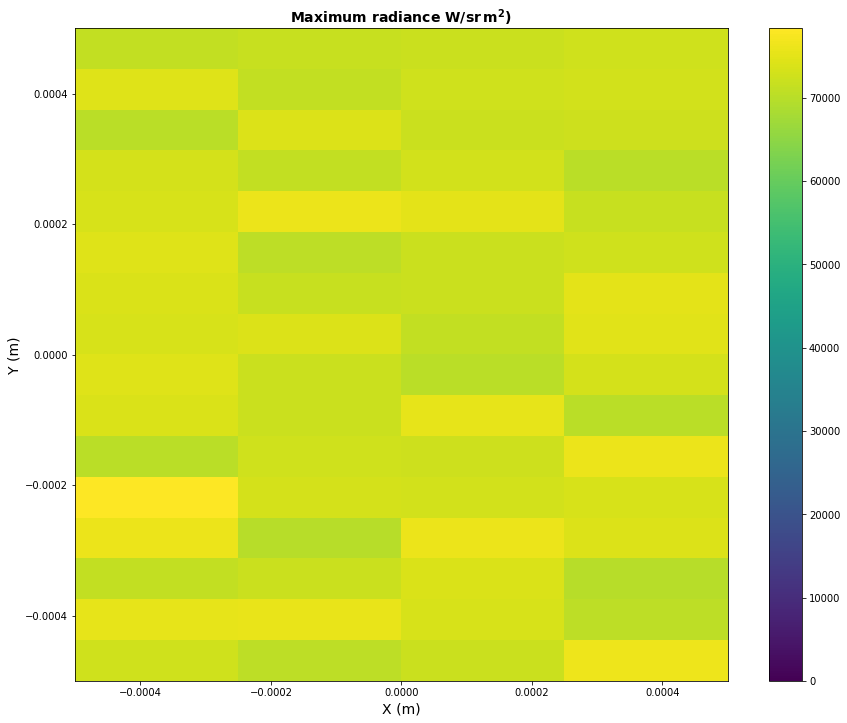

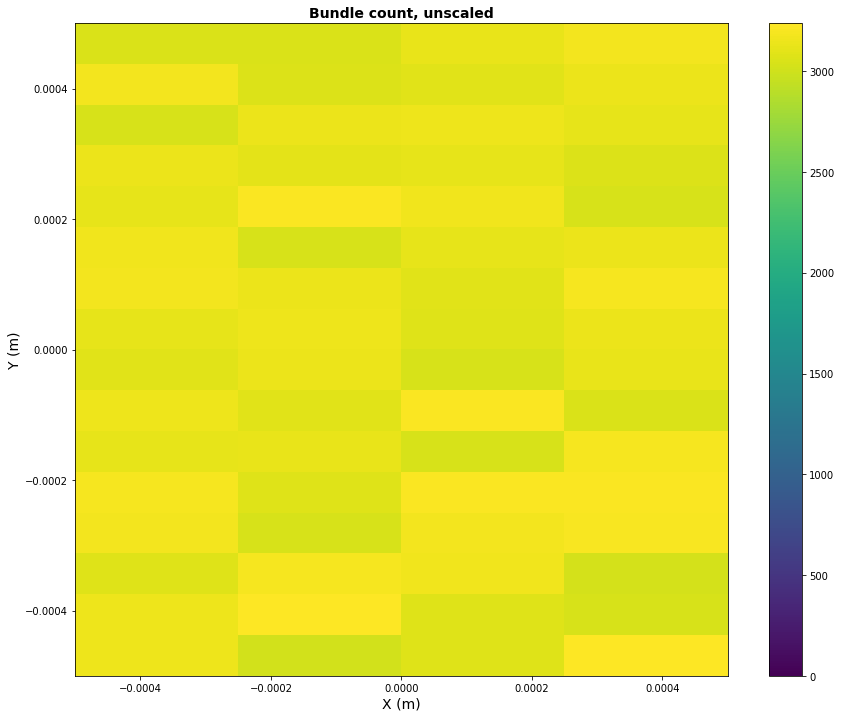

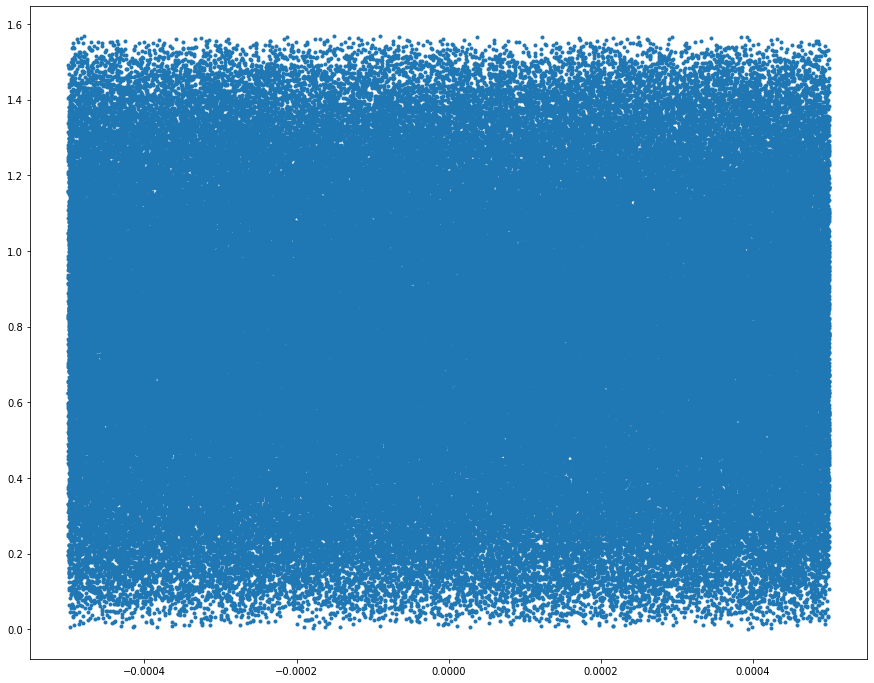

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

photon bundle count: 196299
photon total energy (J): 3.512948966779048e-06


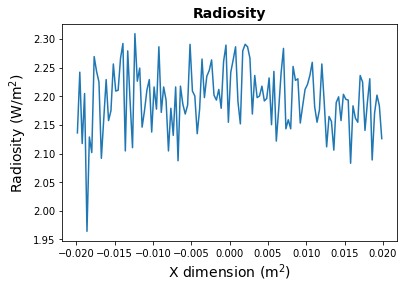

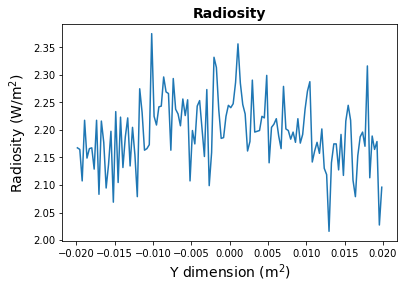

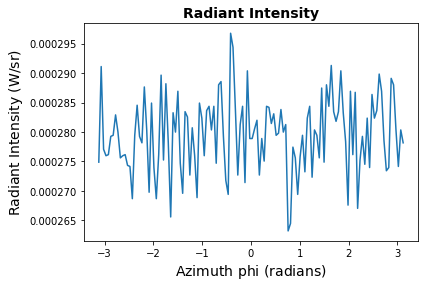

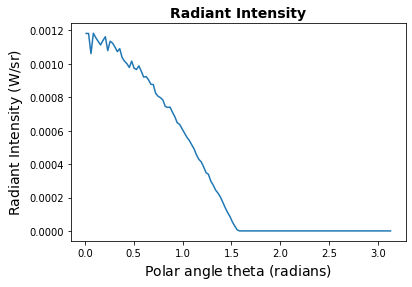

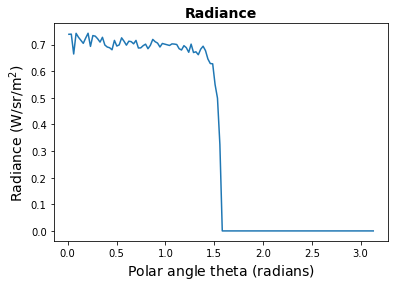

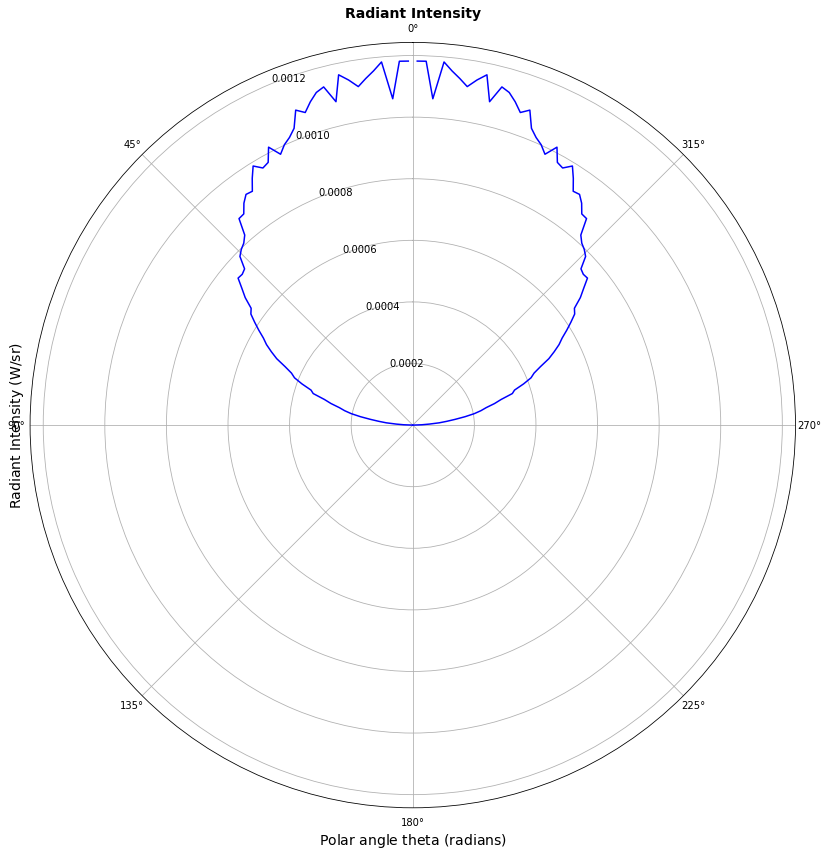

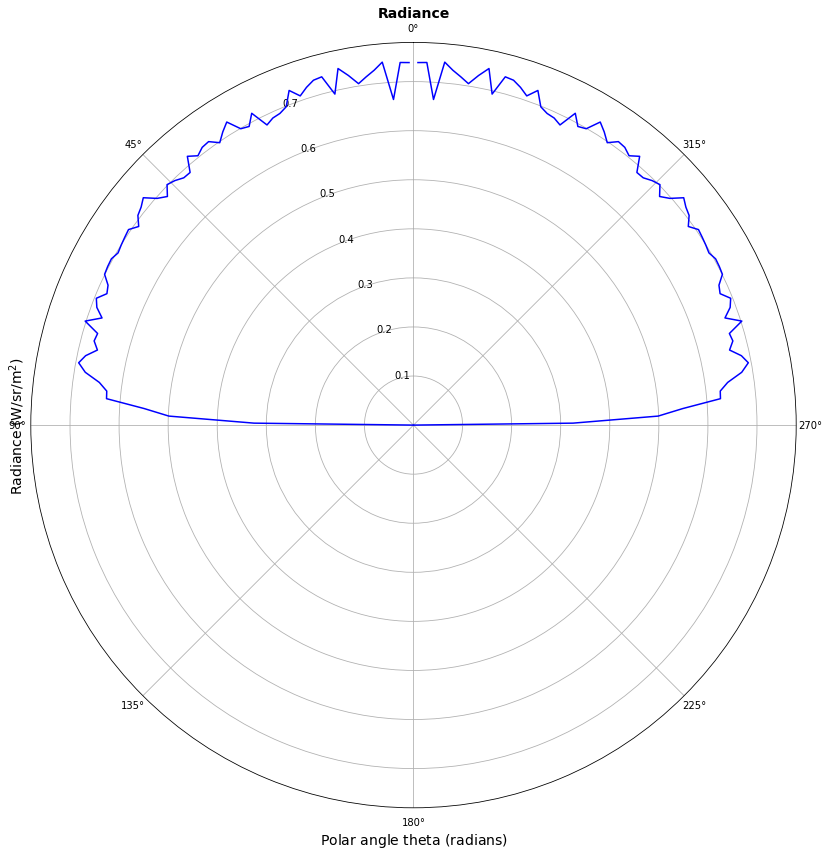

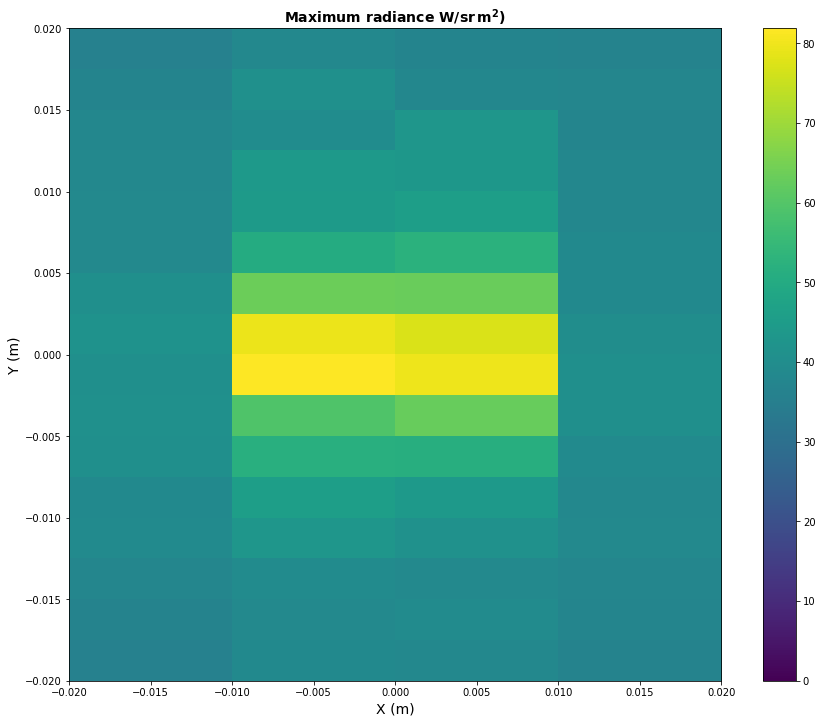

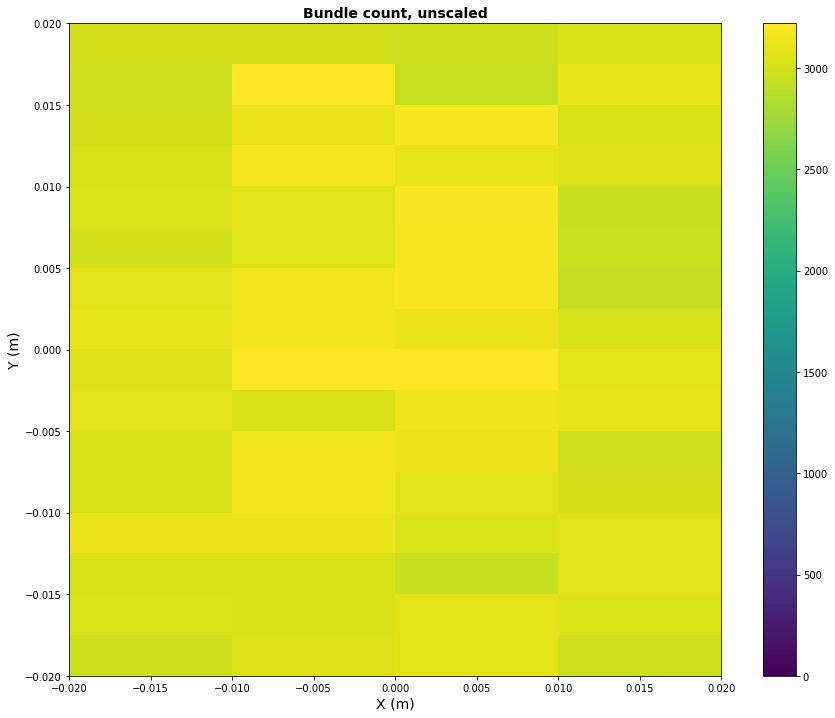

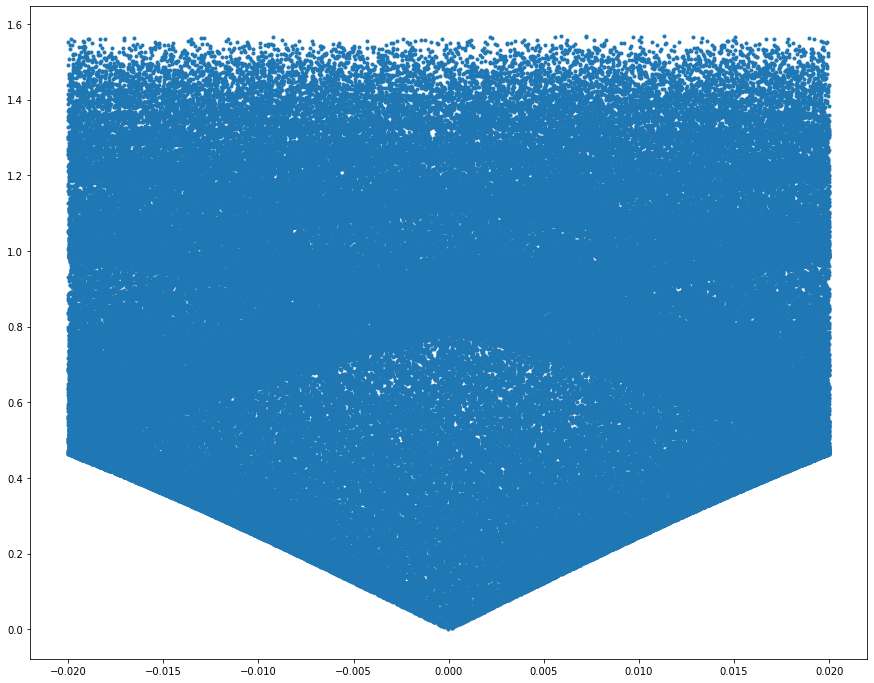

Output()

In [5]:
viz_cuda.summary(results._box_stage)
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stages_3d([results._box_stage])

photon bundle count: 143681
photon total energy (J): 2.571302046855984e-06


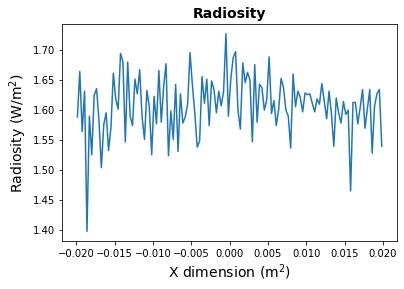

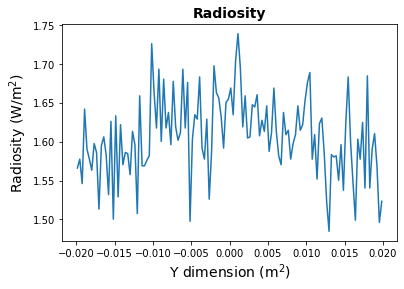

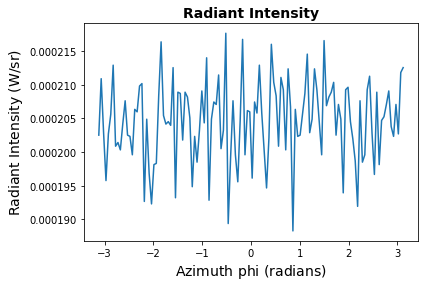

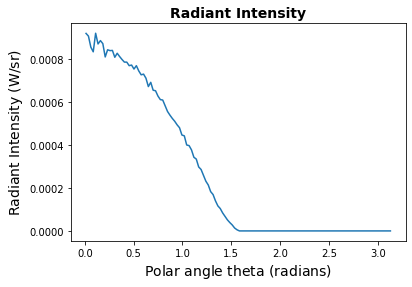

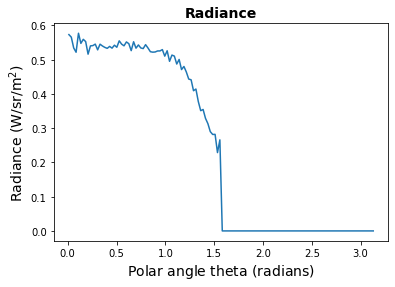

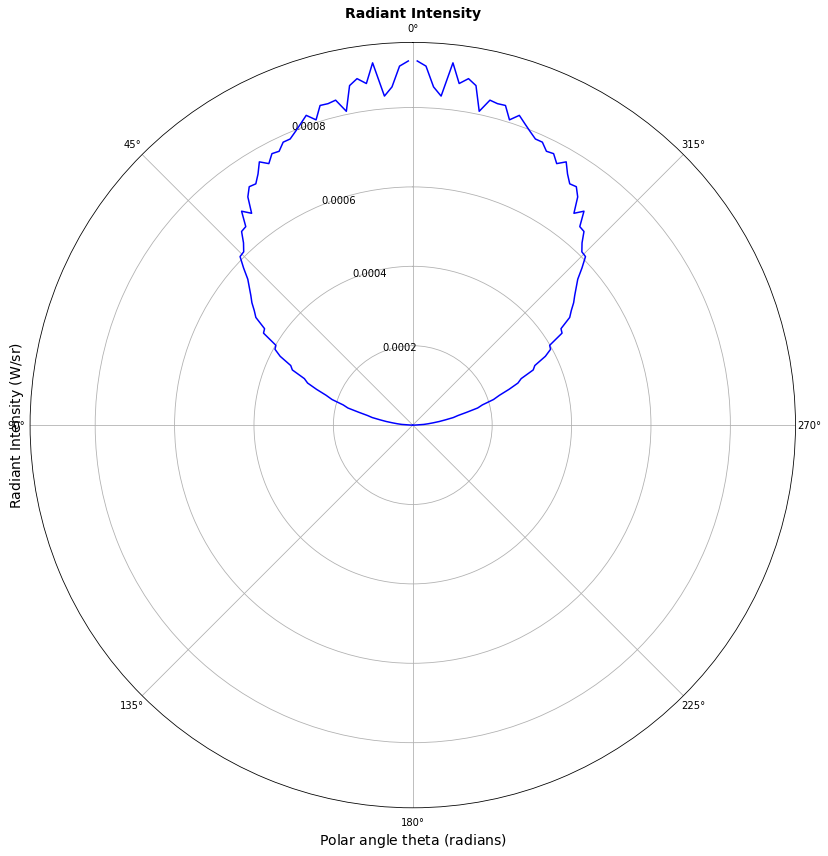

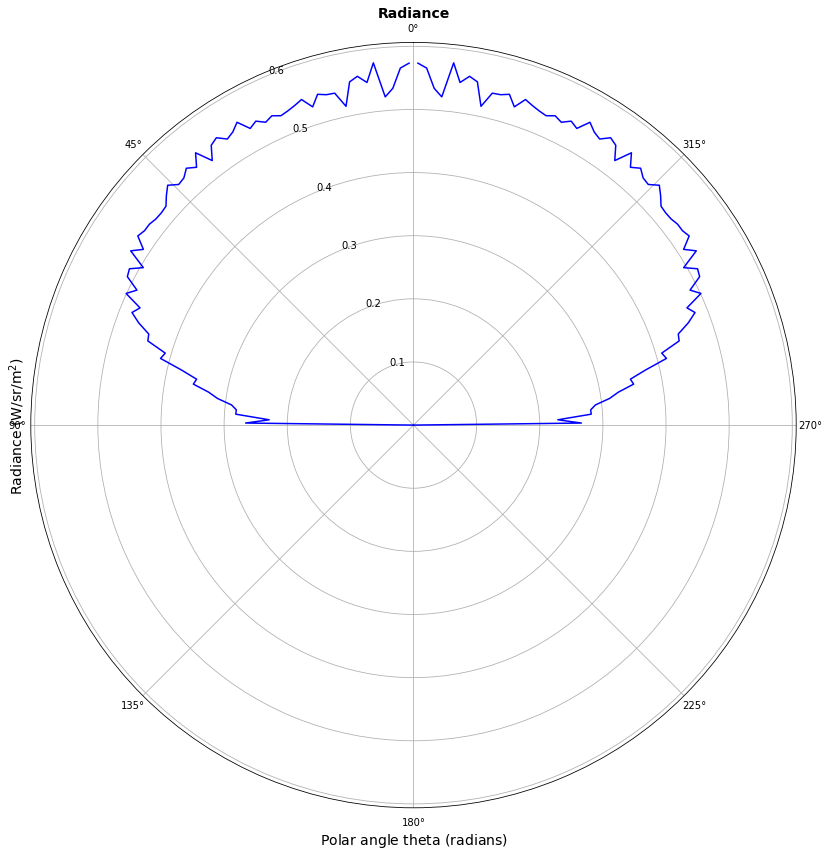

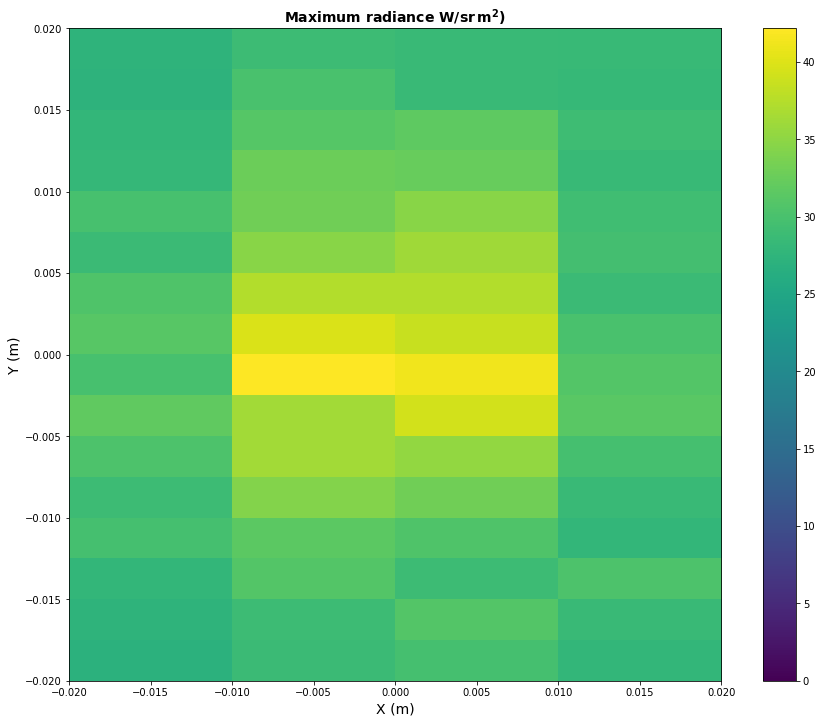

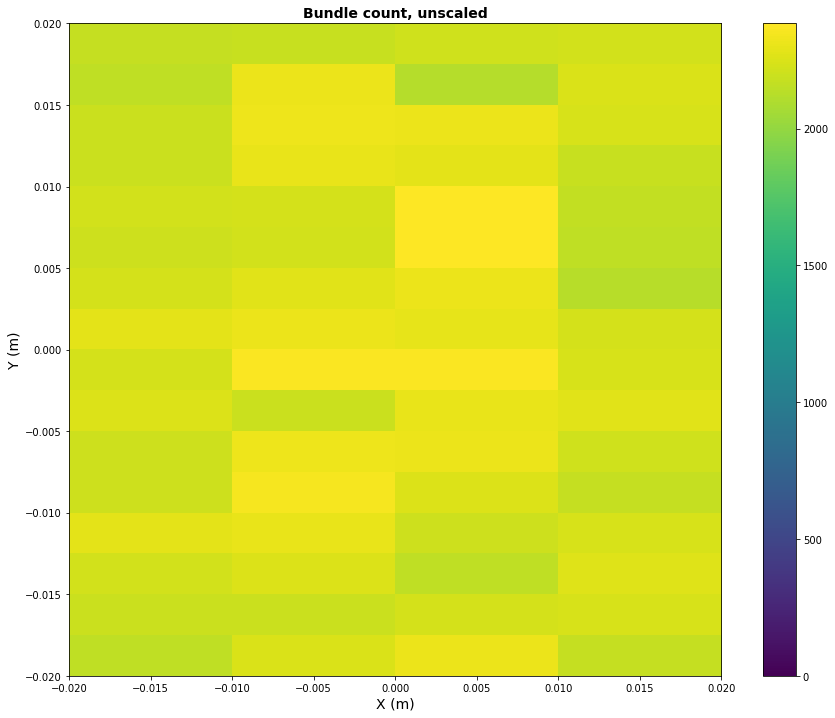

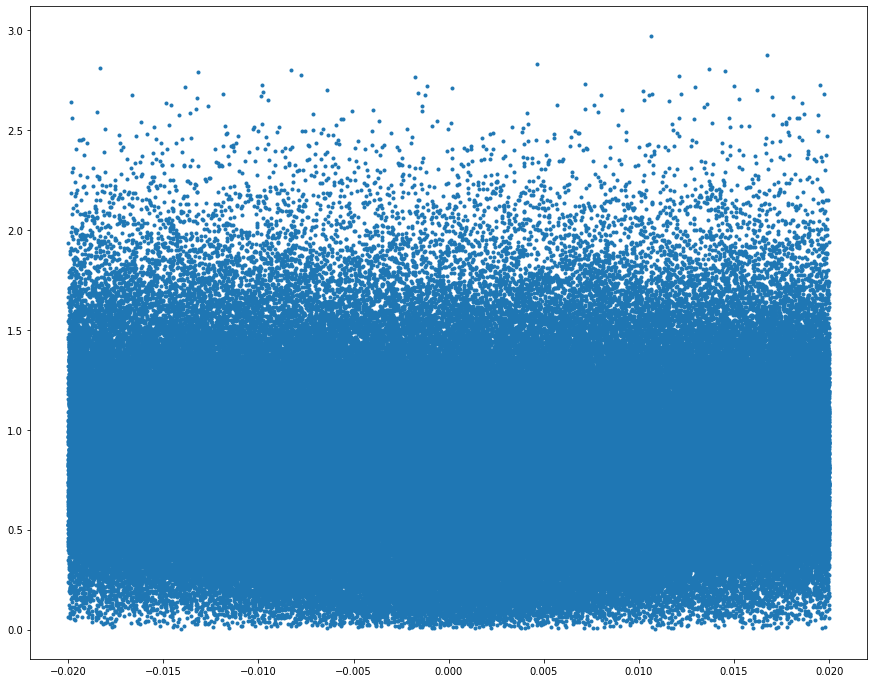

Output()

In [6]:
viz_cuda.summary(results._diffuser_stage)
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stages_3d([results._diffuser_stage])

photon bundle count: 0
photon total energy (J): 0


TypeError: 'NoneType' object is not subscriptable

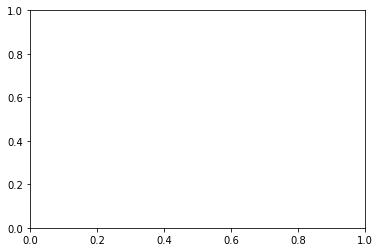

In [7]:
viz_cuda.summary(results._outbound_stage)
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stages_3d([results._outbound_stage])

In [ ]:
viz_cuda.summary(results._inbound_stage)
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stages_3d([results._inbound_stage])

In [ ]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

In [ ]:
viz_cuda.plot_stages_3d([results._diffuser_stage, results._camera_plane_stage])